# Workflow 1: Clustering-Based Segmentation and Risk Assessment

## Iteration 1

### Data (D):
Use the cleaned dataset with features like:
- `CreditScore`
- `DebtToIncomeRatio`
- `LoanAmount`
- `Age`
- `MaritalStatus`
- `AnnualIncome`

### Visualization (V):
#### Generalized Plot Matrix (GPLOM):
Through a combination of bar charts, histograms and scatter plots

#### Parallel Coordinates Plot:
Group by `LoanApproved` to highlight differences in feature trends.

### Model (M):
#### k-Means Clustering:
- Segment loan applicants into clusters based on some features.
- Use k=2 as we want to compare with 

### Knowledge (K):
#### Insights from clusters:
- Example: Cluster A (low risk, high `CreditScore`)
- Example: Cluster B (high risk, low `CreditScore` with high `DebtToIncomeRatio`)

### Feedback Loop (K → D):
- Add a derived feature: `RiskCluster` based on cluster labels.
- Update the dataset with this feature for Iteration 2.

---

## Iteration 2

### Data (D):
Use the dataset with the new `RiskCluster` feature.

### Visualization (V):
#### Heatmap:
Visualize how `RiskCluster` correlates with `LoanApproved`.

#### Cluster Mean Comparisons:
Bar plots to show average `DebtToIncomeRatio` and `CreditScore` per cluster.

### Model (M):
#### Hierarchical Clustering:
- Refine clusters and compare with k-Means results to ensure robustness.

### Knowledge (K):
#### Final insights:
- High-risk clusters can inform business rules for loan approvals.
- Derived feature `RiskCluster` contributes strongly to segmentation.


### Exploratory Data Analysis Visualizations
- GPLOM
- PCP

Index(['PreviousLoanDefaults', 'EducationLevel', 'CreditCardUtilizationRate',
       'LoanApproved', 'JobTenure', 'BankruptcyHistory',
       'NumberOfCreditInquiries', 'TotalLiabilities', 'HomeOwnershipStatus',
       'Age', 'SavingsAccountBalance', 'DebtToIncomeRatio', 'EmploymentStatus',
       'NumberOfDependents', 'MaritalStatus', 'LengthOfCreditHistory',
       'LoanPurpose', 'CreditScore', 'TotalAssets', 'InterestRate',
       'AnnualIncome', 'LoanDuration', 'CheckingAccountBalance', 'LoanAmount',
       'MonthlyDebtPayments', 'NumberOfOpenCreditLines'],
      dtype='object')


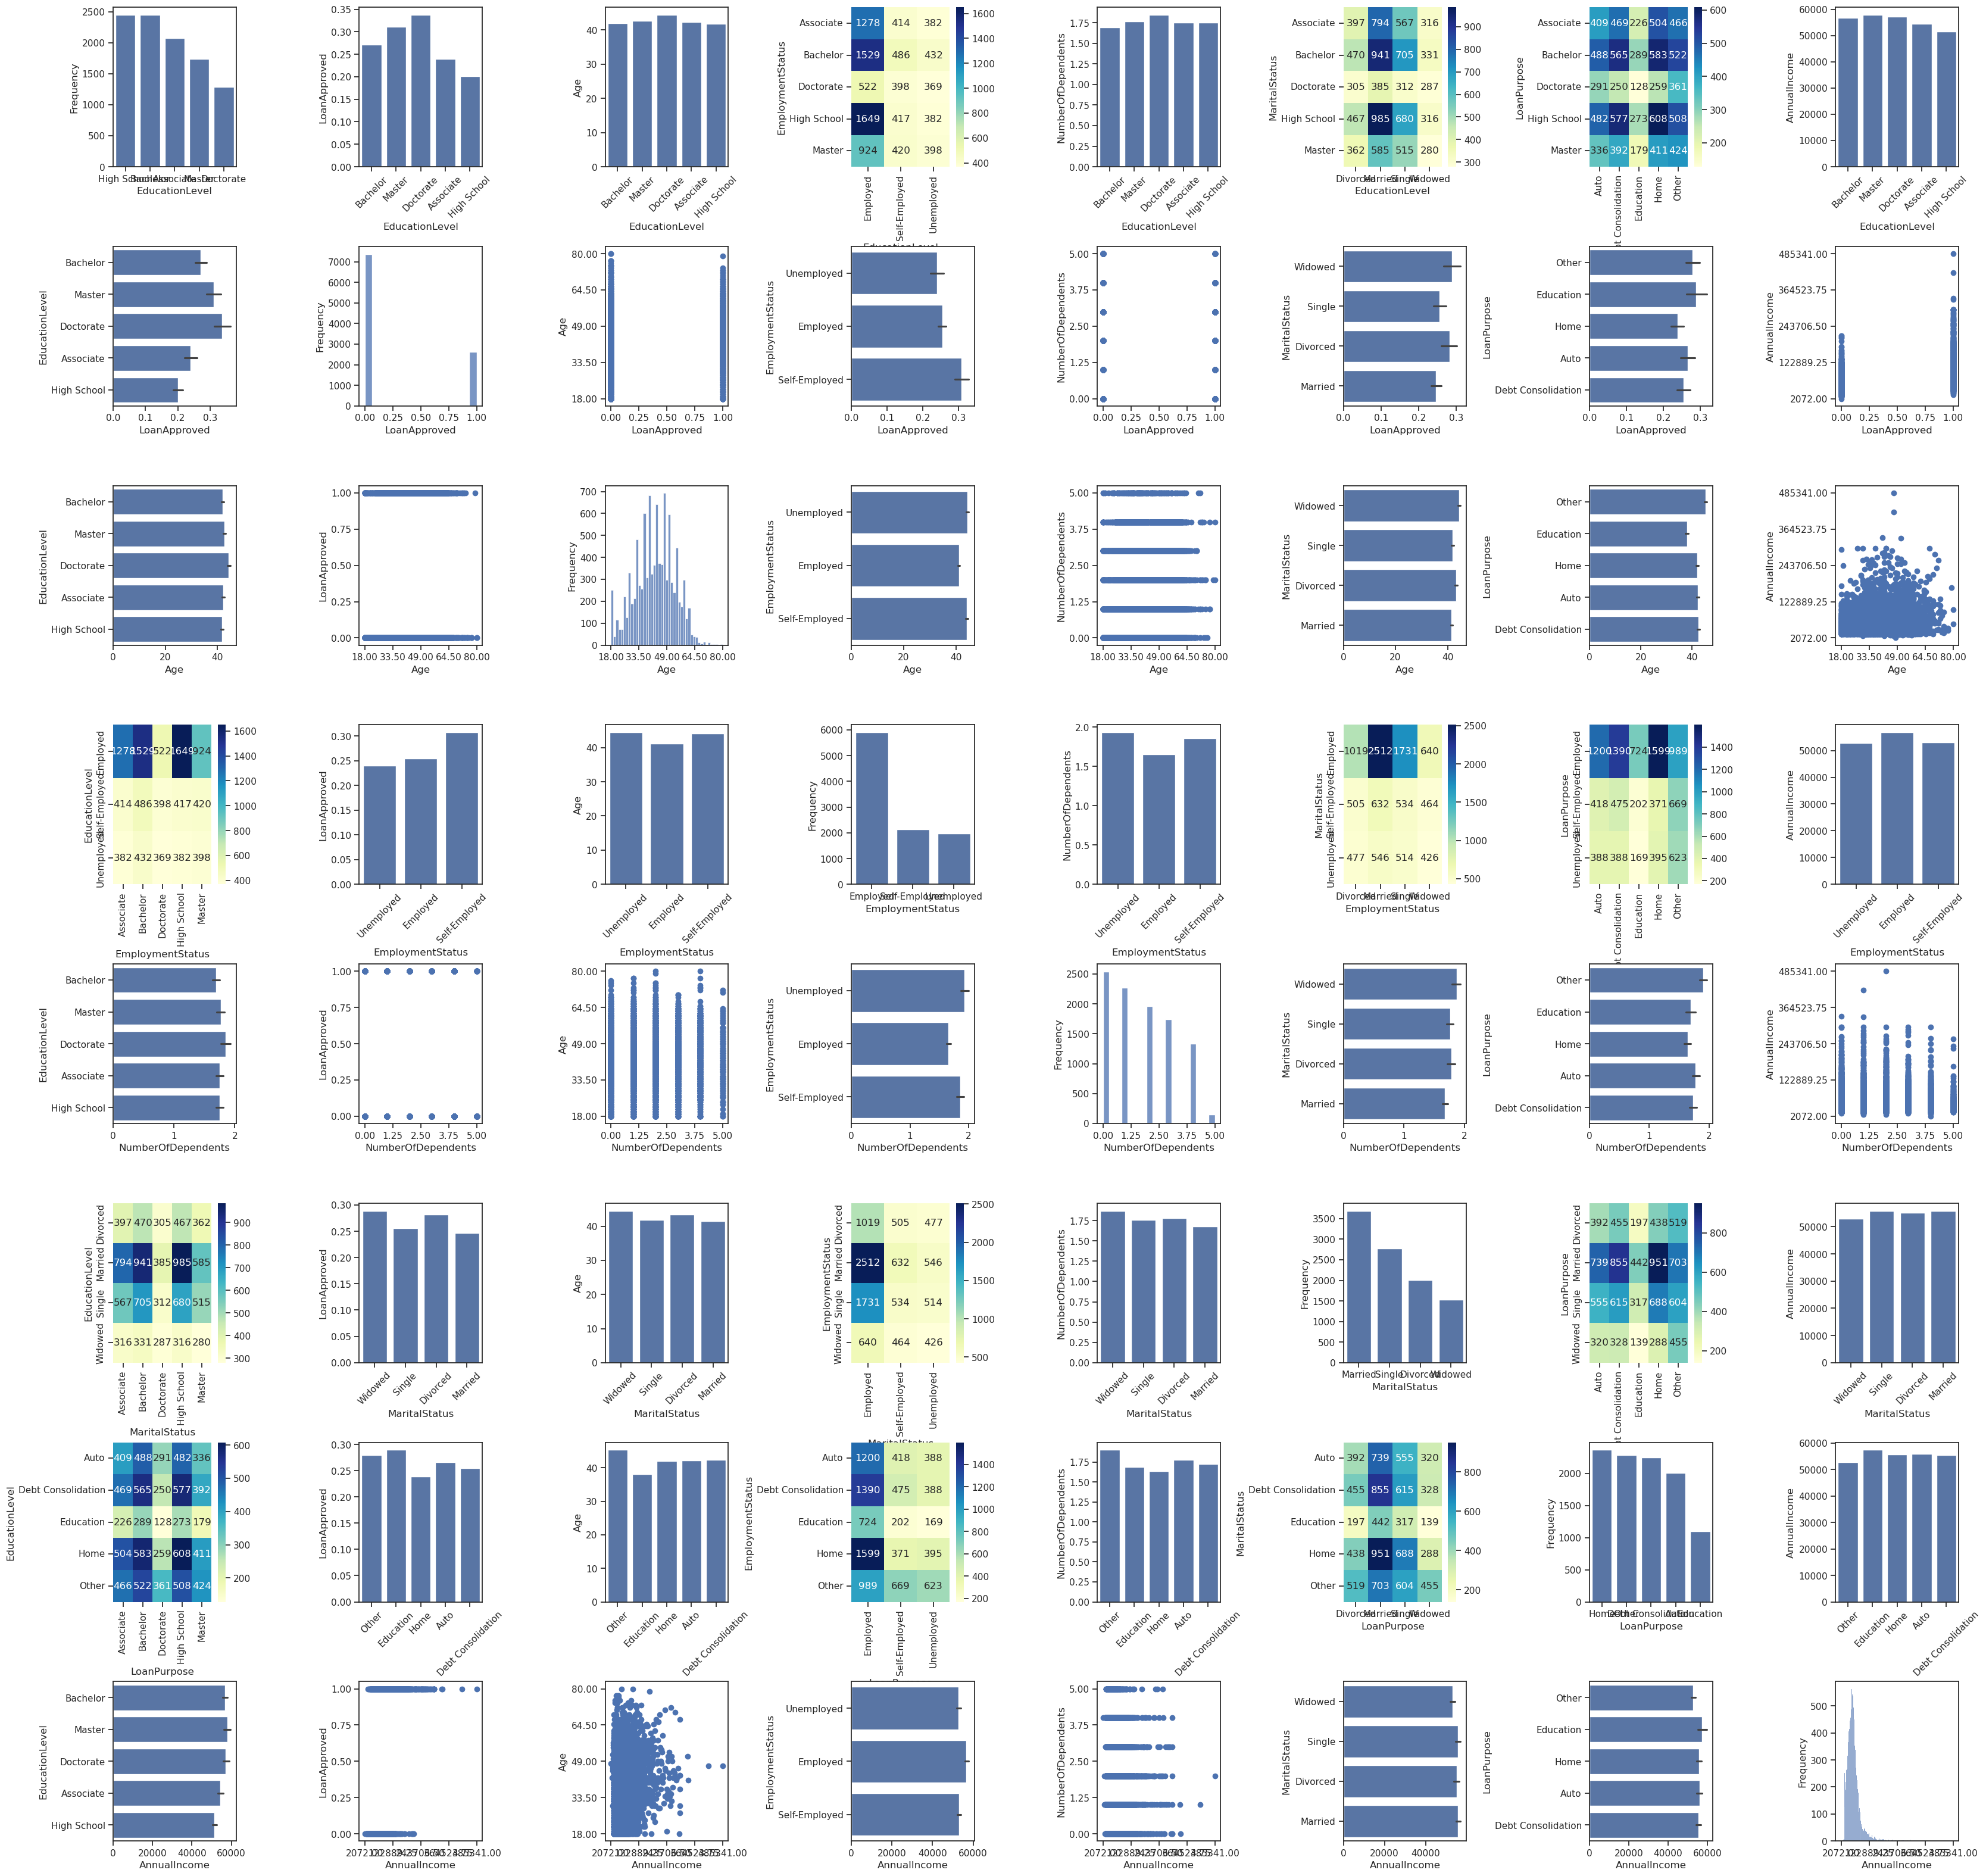

In [108]:
# gplom
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_df = pd.read_csv('../data/base.csv')
print(base_df.columns)

cols_to_use1 = ['LoanPurpose', 'EducationLevel', 'EmploymentStatus', 'Age', 'MaritalStatus', 'AnnualIncome', 'NumberOfDependents', 'LoanApproved']
col_types = [base_df[col].dtype for col in cols_to_use1]
cols_not_used1 = [col for col in base_df.columns if col not in cols_to_use1]
# print(col_types)

viz1_df = base_df.drop(columns=cols_not_used1)

# print(viz1_df.columns)
def special_plot(x, y, ax, plot_type='scatter', xname='a', yname='b'):
    # Plot scatter plot if both x and y are continuous
    if plot_type == 'scatter':
        ax.scatter(x, y)
        ax.set_xlabel(xname)
        ax.set_ylabel(yname)

        # Set axis ticks based on the values of x and y
        ax.set_xticks(np.linspace(min(x), max(x), num=5))  # Set x-ticks evenly spaced
        ax.set_yticks(np.linspace(min(y), max(y), num=5))  # Set y-ticks evenly spaced
        
        # Set tick labels
        ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(min(x), max(x), num=5)])
        ax.set_yticklabels([f'{tick:.2f}' for tick in np.linspace(min(y), max(y), num=5)])

    # Plot bar plot for continuous vs categorical or categorical vs continuous
    elif plot_type == 'bar':
        if x.dtype == 'object':  # Categorical data on x-axis
            # y can't be just y, y needs to have the mean age for each category
            sum_dict = {} # maps a category to an age
            count_dict = {}
            uniq  = []
            for el in x:
                sum_dict[el] = 0
                count_dict[el] = 0
                if el not in uniq:
                    uniq.append(el)
            for i in range(len(x)):
                el = x[i]
                sum_dict[el] += y[i]
                count_dict[el] += 1
            
            y=[]
            for el in uniq:
                y.append(sum_dict[el]/count_dict[el])

            sns.barplot(x=uniq, y=y, ax=ax)
            ax.set_xlabel(xname)
            ax.set_ylabel(yname)
            
            # Set x-ticks and labels for categorical x-axis
            ax.set_xticks(np.arange(len(x.unique())))
            ax.set_xticklabels(x.unique(), rotation=45)
        
        else:  # Continuous data on x-axis
            sns.barplot(x=x, y=y, ax=ax) # do the swap
            ax.set_xlabel(xname)
            ax.set_ylabel(yname)
        

    # Plot heatmap for categorical vs categorical (contingency table)
    elif plot_type == 'heatmap':
        contingency = pd.crosstab(x, y)
        sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
        ax.set_xlabel(xname)
        ax.set_ylabel(yname)

    # Plot histogram for same var twice
    elif plot_type == 'histogram1':
        sns.histplot(x, ax=ax)
        ax.set_xlabel(xname)
        ax.set_ylabel("Frequency")

        # Set the ticks for the histogram
        ax.set_xticks(np.linspace(min(x), max(x), num=5))  # Set x-ticks evenly spaced
        ax.set_xticklabels([f'{tick:.2f}' for tick in np.linspace(min(x), max(x), num=5)])
    
    elif plot_type == 'bar1':
        category_counts = x.value_counts()

        # Create the bar plot with category counts
        sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
        
        # Set labels for the axes
        ax.set_xlabel(xname)
        ax.set_ylabel("Frequency")
        
        # Optionally, format the tick labels on x-axis (if needed)


# Create a large plot
fig, axes = plt.subplots(len(viz1_df.columns), len(viz1_df.columns), figsize=(40, 40))

# Loop through the columns of the dataframe
for i in range(len(viz1_df.columns)):
    for j in range(len(viz1_df.columns)):
        ax = axes[i, j]
        x = viz1_df[viz1_df.columns[i]]
        y = viz1_df[viz1_df.columns[j]]

        if i == j:
            # Diagonal: plot distribution (histogram for continuous, bar plot for categorical)
            if x.dtype == 'object':  # Categorical column
                special_plot(x, y, ax, plot_type='bar1', xname=viz1_df.columns[i], yname='Frequency')
            else:  # Continuous column
                special_plot(x, y, ax, plot_type='histogram1', xname=viz1_df.columns[i], yname='Frequency')
        else:
            # Non-diagonal: use special plot function
            if x.dtype == 'object' and y.dtype == 'object':
                special_plot(x, y, ax, plot_type='heatmap', xname=viz1_df.columns[i], yname=viz1_df.columns[j])
            elif x.dtype == 'object' or y.dtype == 'object':
                special_plot(x, y, ax, plot_type='bar', xname=viz1_df.columns[i], yname=viz1_df.columns[j])
            else:
                special_plot(x, y, ax, plot_type='scatter', xname=viz1_df.columns[i], yname=viz1_df.columns[j])

# Adjust the layout to make it readable
plt.subplots_adjust(wspace=1, hspace=0.5)
plt.show()


### INFERENCES FROM EDA Related Viz1 i.e. GPLOM
Though this generalized plot matrix type of visualization, we get to see some trends in the data.
These are as follows:
- Most continuous variables in the dataset like age and loan amount seem to have skewed normal distributions
- From the scatter plots it seems like most continuous variables appear to be uncorrelated
- There are no individuals that have high credit scores and high debt to income ratios which seems quite logical
- Most other variables both categorical and numerical seem uncorrelated with one another



In [105]:
# pcp
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Load the data
base_df = pd.read_csv('../data/base.csv')

# Columns to use for plotting
# cols_to_use1 = ['CreditScore', 'DebtToIncomeRatio', 'LoanAmount', 'Age', 'MaritalStatus', 'AnnualIncome', 'NumberOfDependents', 'LoanApproved']
# cols_not_used1 = [col for col in base_df.columns if col not in cols_to_use1]

# Create the dataframe with selected columns
# viz1_df = base_df.drop(columns=cols_not_used1)
print(cols_to_use1)
features = cols_to_use1
df = viz1_df[features].copy()

# Handling MaritalStatus as a categorical feature
categorical_features = []
numerical_features = []

for i in range(len(df.columns)):
    col = df.columns[i]
    print(f'{col}', type(df[col]))
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

for col in categorical_features:
    # df['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes
    df[col] = df[col].astype('category').cat.codes
    # print(df[col].dtype)
    break
print('_-------------------------------------------')

# Normalize the continuous variables (optional, for better visualization)
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create a parallel coordinates plot with Plotly
fig = px.parallel_coordinates(
    df, 
    dimensions=features,  
    color="LoanApproved",       # Use 'LoanApproved' as the color dimension
    color_continuous_scale='RdYlGn',  # Green for approved, red for not approved
    labels={feature: feature for feature in features},  # Labels for axes
    title="Parallel Coordinates Plot by Loan Approval Status"
)

# Show the plot
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Normalized Values",
    xaxis=dict(tickangle=45)
)
fig.show()


['LoanPurpose', 'EducationLevel', 'JobTenure', 'Age', 'MaritalStatus', 'AnnualIncome', 'NumberOfDependents', 'LoanApproved']
LoanPurpose <class 'pandas.core.series.Series'>
EducationLevel <class 'pandas.core.series.Series'>
JobTenure <class 'pandas.core.series.Series'>
Age <class 'pandas.core.series.Series'>
MaritalStatus <class 'pandas.core.series.Series'>
AnnualIncome <class 'pandas.core.series.Series'>
NumberOfDependents <class 'pandas.core.series.Series'>
LoanApproved <class 'pandas.core.series.Series'>
_-------------------------------------------


### INFERENCES FROM EDA Related Viz2 i.e PCP
- From the parallel coordinates plot it appears to be clear that factors such as marital status, age and number of dependents that are non-numberic and non-statistical factors lack any kind of influence on the LoanApproved Variable.
- Low Annual Incomes and perhaps other 'economic' and 'financial' factors such as credit scores and dtis may be better determiners.
Since our eda doesn't give us much, we now try to cluster points based on these features to analyze further.

/tmp/ipykernel_86975/361958938.py:55: UserWarning:

The markers list has more values (3) than needed (2), which may not be intended.



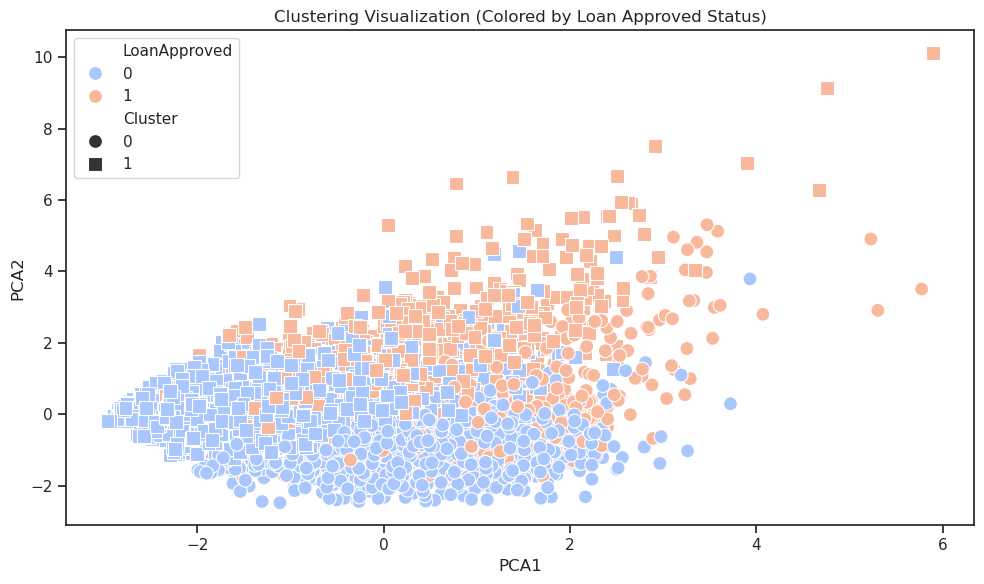

/home/prateek/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/tmp/ipykernel_86975/361958938.py:73: UserWarning:

The markers list has more values (3) than needed (2), which may not be intended.



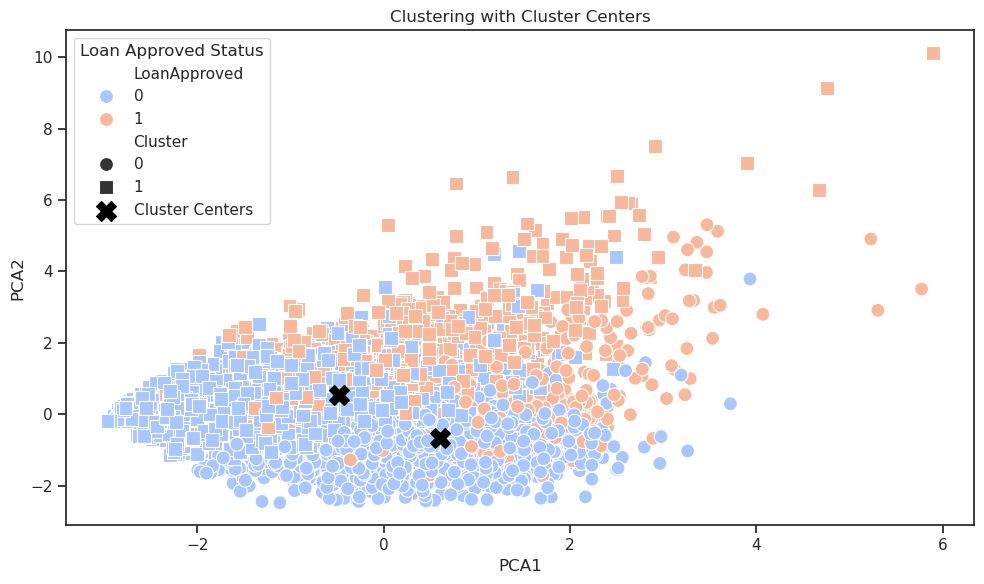

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataframe
base_df = pd.read_csv('../data/base.csv')

# Define categorical and numerical columns
categorical_cols = ['LoanPurpose', 'EducationLevel', 'EmploymentStatus', 'MaritalStatus']
numerical_cols = ['Age', 'AnnualIncome', 'NumberOfDependents']

# Extract the relevant features for clustering
X = base_df[categorical_cols + numerical_cols]

# 1. **Handle Categorical Features**: OneHotEncoding
encoder = OneHotEncoder()  # Leave sparse=True by default
categorical_data = encoder.fit_transform(X[categorical_cols]).toarray()  # Convert sparse to dense
# categorical_data = encoder.fit_transform(X[categorical_cols])

# Get the feature names after OneHotEncoding
categorical_feature_names = encoder.get_feature_names_out(categorical_cols)

# 2. **Handle Numerical Features**: Standardize
scaler = StandardScaler()
numerical_data = scaler.fit_transform(X[numerical_cols])

# 3. **Concatenate Encoded Categorical and Scaled Numerical Data**
# Convert the categorical data to a DataFrame
categorical_data_df = pd.DataFrame(categorical_data, columns=categorical_feature_names)

# Convert the numerical data to a DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Concatenate the DataFrames along the columns axis (axis=1)
processed_data = pd.concat([categorical_data_df, numerical_data_df], axis=1)

# 4. **Clustering with KMeans**
kmeans = KMeans(n_clusters=2, random_state=17)
base_df['Cluster'] = kmeans.fit_predict(processed_data)

# 5. **Apply PCA for Dimensionality Reduction**
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(processed_data)

# Add PCA results to the DataFrame for visualization
base_df['PCA1'] = X_reduced[:, 0]
base_df['PCA2'] = X_reduced[:, 1]

# 6. **Visualization**: Plot the clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PCA1', y='PCA2', hue='LoanApproved', style='Cluster', data=base_df,
                palette='coolwarm', markers=["o", "s", "D"], s=100)

# Set plot labels and title
plt.title('Clustering Visualization (Colored by Loan Approved Status)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Show the plot
plt.tight_layout()
plt.show()

# 7. **Cluster Centers**: Map the KMeans cluster centers to PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# 8. **Plotting the Cluster Centers on the same 2D PCA Plot**
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PCA1', y='PCA2', hue='LoanApproved', style='Cluster', data=base_df,
                palette='coolwarm', markers=["o", "s", "D"], s=100)

plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='X', color='black', s=200, label='Cluster Centers')

# Add labels and show the plot with cluster centers
plt.title('Clustering with Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Loan Approved Status', loc='upper left')
plt.tight_layout()
plt.show()


# OUTCOME OF CLUSTERING
The squares and circles are very overlapping and aren't of distinct colors.
This means it is very almost impossible to segment the population into clusters that correspond to 'Loan Approved' and 'Loan Not Approved'
Thus we change the direction of our analysis to be predictive.